## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [44]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [59]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [60]:
n_rows= df.shape[0]
print(f'{n_rows} is the number of rows')

294478 is the number of rows


c. The number of unique users in the dataset.

In [61]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [62]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [63]:
df.groupby(['group', 'landing_page']).landing_page.count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

In [64]:
n_treatment_oldpage = df[(df.group == 'treatment') & (df.landing_page == 'old_page')].shape[0]
n_control_newpage = df[(df.group == 'control') & (df.landing_page == 'new_page')].shape[0]
print(f'{n_treatment_oldpage + n_control_newpage} is the Number of time the new_page and treatment do not match')

3893 is the Number of time the new_page and treatment do not match


f. Do any of the rows have missing values?

In [65]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

<span style='color:blue'>No missing values</span>

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [66]:
df2 = df[(((df.group =='treatment') & (df.landing_page !='new_page')) 
        | ((df.group =='control') & (df.landing_page !='old_page')))]
df2 = df.drop(df2.index)
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [67]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [68]:
print(f'{df2.shape[0]} is the number of row in df2')
print(f'{df2.user_id.nunique()} is the number of unique user_ids in df2')

290585 is the number of row in df2
290584 is the number of unique user_ids in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [72]:
df2[df2.user_id.duplicated()].reset_index().loc[0,'user_id']

773192

c. What is the row information for the repeat **user_id**? 

In [77]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [78]:
df2.drop_duplicates(subset=['user_id'], inplace=True)
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [79]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [80]:
control_conv_prop = df2[df2.group == 'control'].converted.mean()
control_conv_prop

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
teartment_conv_prop = df2[df2.group == 'treatment'].converted.mean()
teartment_conv_prop

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2[df2.landing_page == 'new_page'].shape[0]/ df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### <span style='color:blue'>Conclusion</span>

<span style='color:blue'>According to the conversion proportion of the treatment group and conversion proportion of the control group, it is clear that the control group (old page) conversion is slightly better than treatment group (new page) conversion. Also the probability that someone land on the new page is only 50%</span>

<span style='color:blue'>In conclusion, there is no sufficient evidence that the new page leads to better conversions.</span> 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

### <span style='color:blue'>Null Hypotheses: $p_{old}$ >= $p_{new}$ (or $p_{new}$ - $p_{old}$ <= 0) </span>

### <span style='color:blue'>Alternative Hypotheses: $p_{new}$ > $p_{old}$ (or $p_{new}$ - $p_{old}$ > 0)</span>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [81]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [82]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

In [83]:
p_new - p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [84]:
n_new = df2[df2.group=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [85]:
n_old = df2[df2.group=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [86]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17357

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [87]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17329

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [88]:
p_new = new_page_converted/n_new 
p_old = old_page_converted/n_old

p_new - p_old

0.00016313909746452915

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [89]:
p_diffs = []
for _ in range(10000):
    p_diffs.append( (np.random.binomial(n_new, p_new)/n_new) - (np.random.binomial(n_old, p_old)/n_old) )

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

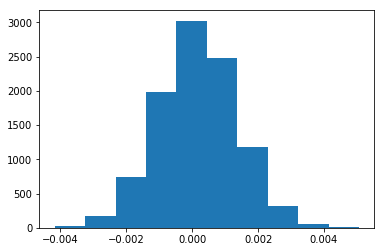

In [90]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [91]:
actual_diff = teartment_conv_prop -  control_conv_prop
prop_p_diff_gt_act_diff = (actual_diff < np.array(p_diffs)).mean()

print(f'{prop_p_diff_gt_act_diff} is the proportion of p_diff > actual difference')

0.9262 is the proportion of p_diff > actual difference


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?


#### <span style='color:blue'>Explanation</span>

<span style='color:blue'>The computation in part j is representing the **p-value**, which is the probability of getting the  statistic (or a more extreme value) if the null is true.
<br>Small p-values suggest our null is not true, and the statistic is likely to come from a different distribution than the null.
<br>Large p-value suggest our null is true, and the statistic is likely to come from the null hyposesis.</span>

<span style='color:blue'>By comparing our p-value to our type I error threshold (α = 5% = 0.05), it's clear that p-value (~0.9) is much greater than α so is not statistically significant and proves that our statistic is likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null hypothesis. 
<br><br>
In conclusion, the resulted p-value suggests the new landing page does not result in higher proportion of conversions than the old page.</span>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page == 'old_page') & (df2.converted==1)].shape[0]
convert_new = df2[(df2.landing_page == 'new_page') & (df2.converted==1)].shape[0]
n_old = df2[df2.landing_page == 'old_page'].shape[0]
n_new = df2[df2.landing_page == 'new_page'].shape[0]

print(f'Old Page number of conversions: {convert_old}')
print(f'New Page number of conversions: {convert_new}')
print(f'Old Page number of rows: {n_old}')
print(f'new Page number of rows: {n_new}')

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Old Page number of conversions: 17489
New Page number of conversions: 17264
Old Page number of rows: 145274
new Page number of rows: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(f'z-score is: {z_score} \np_value is: {p_value}')

z-score is: 1.3109241984234394 
p_value is: 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### <span style='color:blue'>Conclusion</span>

<span style='color:blue'>The calculated z-score and p-value are aligned in the previously calculated ones in part j and k. Resulting in the same conclusion that we failed to reject the null hyposesis.</span> 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### <span style='color:blue'>Logistic Regrission</span>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [92]:
df2[['other_page', 'ab_page']] = pd.get_dummies(df2.group)
df2['intercept'] = 1
df2.head()

,user_id,timestamp,group,landing_page,converted,other_page,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [93]:
fitted = sm.Logit(df2.converted, df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [94]:
summary = fitted.summary2()
summary 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-03 06:07 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In [95]:
p_value = summary.tables[1].loc['ab_page', 'P>|z|']
print(f"{p_value} (~{round(p_value,2)}) is the p-value associated with ab_page")

0.18988621123638716 (~0.19) is the p-value associated with ab_page


#### <span style='color:blue'>p-value associated with ab_page is approximately 0.19</span>

<span style='color:blue'>Using logistic regression model results in p-value 0.19 which indicates that the new landing page is not statistically significant to determine if the new page converted or not.</span> 

<span style='color:blue'>There is a difference between the null and the alternative hypothesis of Logistic regression and A/B Test (part II). That difference comes from the fact that logistic regression is testing whether or not the landing page would lead the user to convert or not. The following explain the difference in null & alternative hyposesis.</sapn>


#### <span style='color:blue'>Logistis Regression: 
<span style='color:blue'>Null hypothesis: there is no difference between the new and the old pages<br>
Alternative hypothesis: the new page is better than the old page</span>

#### <span style='color:blue'>A/B Test (Part II)
<span style='color:blue'>Null hypothesis: the old page is equal or better than the new page in conversion<br>
Alternative hypothesis: the new page is better than the old page in conversion</span>

_______

The p-value associated with ab_page is 0.19. It is higher than 0.05. Thus, the coefficient is not significant.

Alternative hypothesis from part II: the conversion rate of the old_page is less than the conversion rate of the new_page. This assumes a one-tailed test. In Part III, the alternative hypothesis can be formulated as follows: (1) The landing_page type influences (positively or negatively) the conversion rate or (2) the conversion rate of the old_page is different to the conversion rate of the new_page. This assumes a two-tailed test.

in both cases, the results do not support the alternative hypothesis sufficiently.

The p-value is very different. In part II the p-value is 0.91. This might be because the tests of the regression model (not the A/B test) assumes an intercept and because of differences in one or two-tailed testing.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<span style='color:blue'>
Considering other factors to add into your regression model could be useful as more factors might contribute in results' significance and accordingly more accurate decisions.    
<br>    

The main disadvantage of adding more independent variables is multicollinearity, where independent variables might be correlated with each other which results in less accurate coefficient estimates. So although a particular variable might be useful for predicting the response, but because of the correlation it has with other independent variable, the prediction will be less accurate. 
</span>    

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
df_countries = pd.read_csv('countries.csv')
df_countries = pd.merge(df2, df_countries, how='inner', left_on='user_id', right_on='user_id')
df_countries.head()

,user_id,timestamp,group,landing_page,converted,other_page,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US


In [37]:
df_ctry = df_countries.join(pd.get_dummies(df_countries.country))
df_ctry.head(5)

,user_id,timestamp,group,landing_page,converted,other_page,ab_page,intercept,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,US,0,0,1


In [38]:
summery = sm.Logit(df_ctry.converted, df_ctry[['intercept','ab_page','CA', 'US']]).fit().summary2()
summery

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-03 05:15 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9794    0.0127  -155.4145  0.0000  -2.0044  -1.9544
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0506    0.0284    -1.7835  0.0745  -0.1063   0.0050
US           -0.0099    0.0133    -0.7433  0.4573  -0.0359   0.0162
==================================================================

"""

In [39]:
ab_page_coef = 1/np.exp(summery.tables[1].loc['ab_page','Coef.'])
CA_coef = 1/np.exp(summery.tables[1].loc['CA','Coef.'])
US_coef = 1/np.exp(summery.tables[1].loc['US','Coef.'])

print(f'Individuals who landed on old page are {round(ab_page_coef,4)} more likely to convert than who landed on new page, holding all else constant') 
print(f'Individuals form UK are {round(CA_coef,4)} more likely to convert than individuals from CA, holding all else constant') 
print(f'Individuals form UK are {round(US_coef,4)} more likely to convert than individuals from US, holding all else constant') 


Individuals who landed on old page are 1.0151 more likely to convert than who landed on new page, holding all else constant
Individuals form UK are 1.0519 more likely to convert than individuals from CA, holding all else constant
Individuals form UK are 1.0099 more likely to convert than individuals from US, holding all else constant


#### <span style='color:blue'>Conclusion</span>
<span style='color:blue'>Country variables has no impact on whether or not an individual might convert to the new page or not, that is clear from the p-values that are greater than the error type I threshold (0.05), which is statistically not significant</span>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
df_ctry['page_US'] = df_ctry.ab_page  * df_ctry.US
df_ctry['page_CA'] = df_ctry.ab_page * df_ctry.CA

summary = sm.Logit(df_ctry.converted, df_ctry[['intercept', 'page_US', 'page_CA']]).fit().summary2()
summary

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-03 05:15 AIC:              212777.1060
No. Observations:   290584           BIC:              212808.8450
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9873    0.0072  -275.5728  0.0000  -2.0014  -1.9732
page_US      -0.0197    0.0121    -1.6337  0.1023  -0.0434   0.0039
page_CA      -0.0842    0.0378    -2.2251  0.0261  -0.1583  -0.0100
==================================================================

"""

In [41]:
page_us_coef = 1/np.exp(summary.tables[1].loc['page_US','Coef.'])
page_ca_coef = 1/np.exp(summary.tables[1].loc['page_CA','Coef.'])


print(f'* Individuals who landed on the old page and are from UK are {page_us_coef} times more likely to convert than those who landed on the new page and are from US, holding all else constants') 
print('\n')
print(f'* Individuals who landed on the old page and are from UK are {page_ca_coef} times more likely to convert than those who landed on the new page and are from CA, holding all else constants. ') 


* Individuals who landed on the old page and are from UK are 1.0199347185275203 times more likely to convert than those who landed on the new page and are from US, holding all else constants


* Individuals who landed on the old page and are from UK are 1.087793144641978 times more likely to convert than those who landed on the new page and are from CA, holding all else constants. 


#### <span style='color:blue'>Conclusion</span>

<span style='color:blue'>The interaction between page and CA has significant effects on conversion rate because it's p-value (0.026) is less than type I error threshold (0.05) which is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct. Therefore, we reject the null hypothesis, and accept the alternative hypothesis. However, this does not mean that there is a 95% probability that the alternative hypothesis is true. The p-value is conditional upon the null hypothesis being true is unrelated to the truth or falsity of the research hypothesis.</span>

<span style='color:blue'>On the other hand, the interaction between page and US does not have significant effects on conversion rate because it's p-value (0.1023) is greater than type I error threshold (0.05) which is not statistically significant, and indicates strong evidence for the null hypothesis. This means we stick to the null hypothesis and reject the alternative hypothesis.</span>

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0